In [1]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload

import seaborn as sns
import pandas as pd
import pickle

import neuraltda.spectralAnalysis as sa
import neuraltda.simpComp as sc

/home/brad/.conda/envs/neuraltda-3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
block_path = '/home/brad/krista/B1083/P03S03/'

bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/', 'B1235': '/home/brad/krista/B1235/P02S01/'}


In [3]:
#bin the data
winsize = 10.0
dtovr = winsize*0.5
comment = 'ForJSDivergence'
segment_info = [0,0]

bdfs = []
birds = ['B1083', 'B1235', 'B1075']
for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, winsize, segment_info, cluster_group=['Good'], dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs.append([bird, bdf])

/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForJSDivergence/20170731T155520Z-10.0-5.0.binned
/home/brad/krista/B1235/P02S01/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForJSDivergence/20170731T180936Z-10.0-5.0.binned
/home/brad/krista/B1075/P01S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-ForJSDivergence/20170731T180945Z-10.0-5.0.binned


In [4]:
# compute scgs.  
thresh = 6.0
cmnt = 'ForJSDivergence'

scgGenFiles = {}
for bdfj in bdfs:
    bdf = bdfj[1]
    scgGenFiles[bdfj[0]] = sa.computeChainGroups(block_path, bdf, thresh, comment=cmnt)

Computing Chain Groups...
KeysView(<HDF5 file "20170731T155520Z-10.0-5.0.binned" (mode r)>)
Stim: I_40k, Clusters:None
Stim: J_40k, Clusters:None
Stim: K_40k, Clusters:None
Stim: L_40k, Clusters:None
Stim: M_40k, Clusters:None
Stim: N_40k, Clusters:None
Stim: O_40k, Clusters:None
Stim: P_40k, Clusters:None
Computing Chain Groups...
KeysView(<HDF5 file "20170731T180936Z-10.0-5.0.binned" (mode r)>)
Stim: A_scaled_burung, Clusters:None
Stim: B_scaled_burung, Clusters:None
Stim: C_scaled_burung, Clusters:None
Stim: D_scaled_burung, Clusters:None
Stim: E_scaled_burung, Clusters:None
Stim: F_scaled_burung, Clusters:None
Stim: G_scaled_burung, Clusters:None
Stim: H_scaled_burung, Clusters:None
Stim: I_scaled_burung, Clusters:None
Stim: J_scaled_burung, Clusters:None
Stim: K_scaled_burung, Clusters:None
Stim: L_scaled_burung, Clusters:None
Stim: M_scaled_burung, Clusters:None
Stim: N_scaled_burung, Clusters:None
Stim: O_scaled_burung, Clusters:None
Stim: P_scaled_burung, Clusters:None
Computin

In [58]:
scgf = scgGenFiles['B1235']

In [64]:
block_path

'/home/brad/krista/B1075/P01S03/'

In [59]:

#scgf = '/home/brad/krista/B1083/P03S03/scg/20170731T155520Z-10.0-5.0-10.0-ForJSDivergence.scg'
with open(scgf, 'rb') as f:
    scg = pickle.load(f)
    
print(scgf)

/home/brad/krista/B1075/P01S03/scg/20170731T180936Z-10.0-5.0-6.0-ForJSDivergence.scg


In [153]:
trials_A = {}
trials_B = {}

for stim in scg.keys():
    trials_A[stim] = scg[stim][:10]
    trials_B[stim] = scg[stim][10:]

In [61]:
# within stim
reload(sa)
d = 1
betas = [-1.0]
JS_save = {}
for stim in scg.keys():
    print(stim)
    JS_stim = np.zeros((10, len(betas)))
    for A1 in range(10):
        for B1 in range(1):
            print(A1)
            scgA = trials_A[stim][A1]
            scgB = trials_B[stim][A1]
            JS = []
            for beta in betas:
                print(beta)
                JS = sa.compute_JS_expanded(scgA, scgB, d, beta)
            JS_stim[A1, :] = np.array(JS)
    JS_save[stim] = JS_stim

A_scaled_burung
0
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
-1.0
Computing Laplacians
Re

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
I_scaled_burung
0
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
-1.0
Computing Laplacians
Reconciling Laplacians
Computi

Computing JS divergence
k
k
5
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
-1.0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k


In [168]:
# between stim
reload(sa.sc)
reload(sc)
reload(sa)
d = 2
betas = np.linspace(-5.0, -0.01, 20)
betas = [-4.0, -2.0, -0.15]
betas = [-1.8]

stims = list(scg.keys())
nstims = len(stims)
ntrialsper = 10*10
JS = np.zeros((nstims, nstims, ntrialsper, len(betas)))
for stimA_ind in range(nstims):
    stimA = stims[stimA_ind]
    print(stimA)
    for stimB_ind in range(stimA_ind, nstims):
        stimB = stims[stimB_ind]
        print(stimB)
        for A1 in range(10):
            for B1 in range(10):
                print(A1)
                scgA = trials_A[stimA][A1]
                scgB = trials_B[stimB][B1]
                for ind, beta in enumerate(betas):
                    print(ind)
                    JS[stimA_ind, stimB_ind, A1*10 + B1, ind] = sa.compute_JS_expanded(scgA, scgB, d, beta)


A_scaled_burung
A_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Lapl

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacia

8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrice

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacia

Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Lapl

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
C_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reco

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
G_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reco

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacia

4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrice

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacia

4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrice

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacia

k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matri

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacia

k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matri

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
E_scaled_burung
0
0
Computing Laplacians
Reco

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Co

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
I_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computi

k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matri

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrice

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
M_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reco

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
E_scaled_burung
E_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
I_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computi

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
M_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reco

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacia

k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matri

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
F_scaled_burung
F_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
M_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computi

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
H_scaled_burung
H_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
L_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reco

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
P_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computi

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
L_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reco

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
P_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reco

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrice

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
M_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reco

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matri

k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matri

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacia

k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matri

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
O_scaled_burung
0
0
Computing Laplacians
Reco

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacia

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacia

k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matri

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
P_scaled_burung
0
0
Computing Laplacians
Reco

7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrice

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacia

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k


In [191]:
# between stim: sum of divergences
reload(sa.sc)
reload(sc)
reload(sa)
d = 2
betas = np.linspace(-5.0, -0.01, 20)
betas = [-4.0, -2.0, -0.15]
betas = [-1.8]

stims = list(scg.keys())
nstims = len(stims)
ntrialsper = 10*10
JS = np.zeros((nstims, nstims, ntrialsper, len(betas)))
for stimA_ind in range(nstims):
    stimA = stims[stimA_ind]
    print(stimA)
    for stimB_ind in range(stimA_ind, nstims):
        stimB = stims[stimB_ind]
        print(stimB)
        for A1 in range(10):
            for B1 in range(10):
                print(A1)
                scgA = trials_A[stimA][A1]
                scgB = trials_B[stimB][B1]
                for ind, beta in enumerate(betas):
                    print(ind)
                    JS[stimA_ind, stimB_ind, A1*10 + B1, ind] = sa.compute_JS_expanded(scgA, scgB, 1, beta) + sa.compute_JS_expanded(scgA, scgB, 2, beta)


A_scaled_burung
A_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Den

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing L

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS div

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing L

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS div

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
H_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
C

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing L

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing L

5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS diver

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
O_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
C

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing L

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing L

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
G_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Co

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing L

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS diver

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing L

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS diver

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
G_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
C

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density

k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS div

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
N_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
C

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
H_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices


Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS div

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
O_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
C

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling L

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
J_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
C

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
H_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
C

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS diver

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS div

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS diver

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing L

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS div

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density

0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS diver

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS div

Computing JS divergence
k
k
L_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
C

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
J_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
C

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS div

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
K_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
C

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing L

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing L

k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS div

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing L

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing L

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing L

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing L

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
K_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
C

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing L

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS diver

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing L

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
L_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
C

Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS diver

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling L

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS diver

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS diver

k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
N_scaled_burung
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices


k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS div

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS diver

Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing L

k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS div

k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS div

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing L

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS diver

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
2
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
6
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
0
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS diver

Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
4
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
1
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
5
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
9
0
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
3
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
7
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
8
0
Computing Laplacians
Reconciling Laplacians
Computing Density Matrices
Computing JS divergence
k
k
Computing Laplacians
Reconciling Laplacians
Computing Density

In [192]:
block_path = bps['B1235']
with open(os.path.join(block_path, 'JS_save_10x10_d2+d1.pkl'), 'wb') as f:
    pickle.dump(JS, f)

In [132]:
stims

['A_scaled_burung',
 'B_scaled_burung',
 'C_scaled_burung',
 'D_scaled_burung',
 'E_scaled_burung',
 'F_scaled_burung',
 'G_scaled_burung',
 'H_scaled_burung',
 'I_scaled_burung',
 'J_scaled_burung',
 'K_scaled_burung',
 'L_scaled_burung',
 'M_scaled_burung',
 'N_scaled_burung',
 'O_scaled_burung',
 'P_scaled_burung']

In [136]:
JSavg = np.mean(JS, axis=2)
print(JSavg.shape)
JS.shape

(16, 16, 1)


(16, 16, 100, 1)

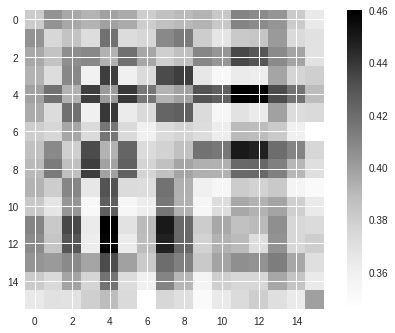

In [131]:
b = 0
D = np.triu(JSavg[:, :, b]) + np.triu(JSavg[:, :, b], 1).T
plt.imshow(D)
plt.colorbar()

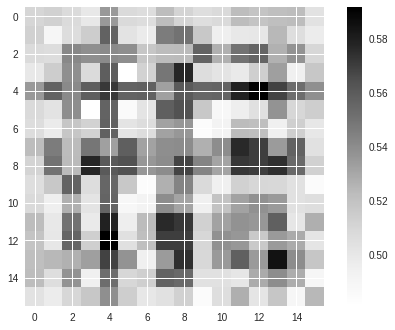

In [95]:
b = 0
D = np.triu(JSavg[:, :, b]) + np.triu(JSavg[:, :, b], 1).T
plt.imshow(D)
plt.colorbar()

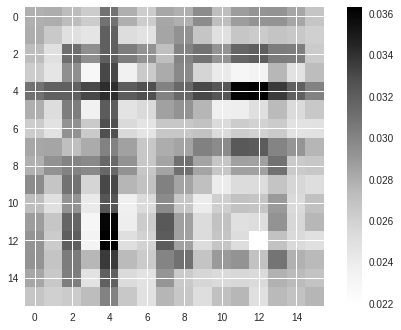

In [84]:
b = 2
D = np.triu(JSavg[:, :, b]) + np.triu(JSavg[:, :, b], 1).T
plt.imshow(D)
plt.colorbar()

In [ ]:
diff = []
for ind, beta in enumerate(betas):
    D = np.triu(JSavg[:, :, ind]) + np.triu(JSavg[:, :, ind], 1).T
    diff.append(np.amax(D)-np.amin(D))
    print(beta)
    print(np.amax(D)-np.amin(D))
    print('\n')

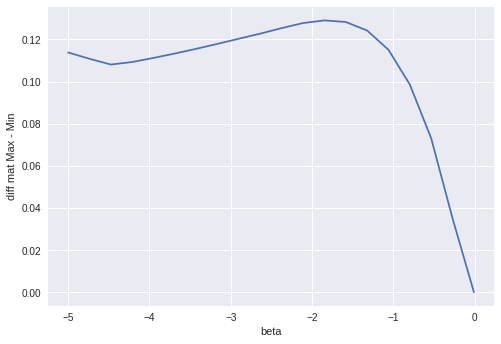

In [120]:
    
plt.plot(betas, diff)
plt.xlabel('beta')
plt.ylabel('diff mat Max - Min')

In [118]:
betas[np.argmax(diff)]
np.argmax(diff)

12

In [44]:
D = np.triu(JSavg) + np.triu(JSavg, 1).T
intra_unf_dat = D[0:4, 0:4][np.triu_indices(4)]
intra_fam_dat = D[4:, 4:][np.triu_indices(4)]
inter_dat = D[0:4, 4:]
intra_unf = np.mean(intra_unf_dat)
intra_unf_std = np.std(intra_unf_dat)
intra_unf_sterr = intra_unf_std / len(intra_unf_dat)

intra_fam = np.mean(intra_fam_dat)
intra_fam_std = np.std(intra_fam_dat)
intra_fam_sterr = intra_fam_std / len(intra_fam_dat)

inter = np.mean(inter_dat)
inter_std = np.std(D[0:4, 4:])
inter_sterr = inter_std / len(inter_dat)
print(str(intra_unf) + ' +- ' + str(intra_unf_sterr))
print(str(intra_fam) + ' +- ' + str(intra_fam_sterr))
print(str(inter) + ' +- ' + str(inter_sterr))

0.333527035024 +- 0.00536148023984
0.306055092914 +- 0.00523592623298
0.357635766629 +- 0.0175807320415


In [45]:
print(str(intra_unf - intra_unf_sterr) + ' ' + str(intra_unf + intra_unf_sterr))
print(str(intra_fam - intra_fam_sterr) + ' ' + str(intra_fam + intra_fam_sterr))
print(str(inter - inter_sterr) + ' ' + str(inter + inter_sterr))

0.328165554784 0.338888515264
0.300819166681 0.311291019147
0.340055034588 0.375216498671


In [193]:
D = np.zeros(np.shape(JS[:, :, :, 0]))
for ind in range(np.shape(JS)[2]):
    
    D[:, :, ind] = np.triu(JS[:, :, ind, 0]) + np.triu(JS[:, :, ind, 0], 1).T
    
#D = JS[:, :, :, 0]
unf_inds = [0,1,2,3, 8,9,10,11, 12,13,14, 15]
fam_inds = [4,5,6,7]
L_inds = [4,6]
R_inds = [5,7]

D_unf = D[unf_inds, unf_inds]
D_unf = np.take(np.take(D, unf_inds, axis=0), unf_inds, axis=1)
D_fam = np.take(np.take(D, fam_inds, axis=0), fam_inds, axis=1)
D_fam_unf =np.take(np.take(D, fam_inds, axis=0), unf_inds, axis=1)
D[:, 0, 0]

array([ 0.87785261,  1.13774761,  1.08007984,  0.86149068,  0.76759706,
        1.00000015,  1.07039192,  0.59816181,  0.82481727,  1.03062217,
        1.10570478,  1.19929301,  1.09345158,  0.66293822,  0.94873986,
        0.88160623])

In [194]:
#get unique(triangular values)
triu_inds = np.triu_indices(12)
ti2 = np.triu_indices(4)
D_unf_unique = np.zeros((78, 100))
D_fam_unique = np.zeros((len(ti2[0]), 100))
for ind in range(100):
    D_unf_unique[:, ind] = D_unf[:, :, ind][triu_inds]
    D_fam_unique[:, ind] = D_fam[:, :, ind][ti2]

In [171]:
D_L = np.take(np.take(D, L_inds, axis=0), L_inds, axis=1)
D_R = np.take(np.take(D, R_inds, axis=0), R_inds, axis=1)
D_LR = np.take(np.take(D, R_inds, axis=0), L_inds, axis=1)

0.306055092914


([<matplotlib.axis.XTick at 0x7fd02ee3d780>,
 <a list of 3 Text xticklabel objects>)

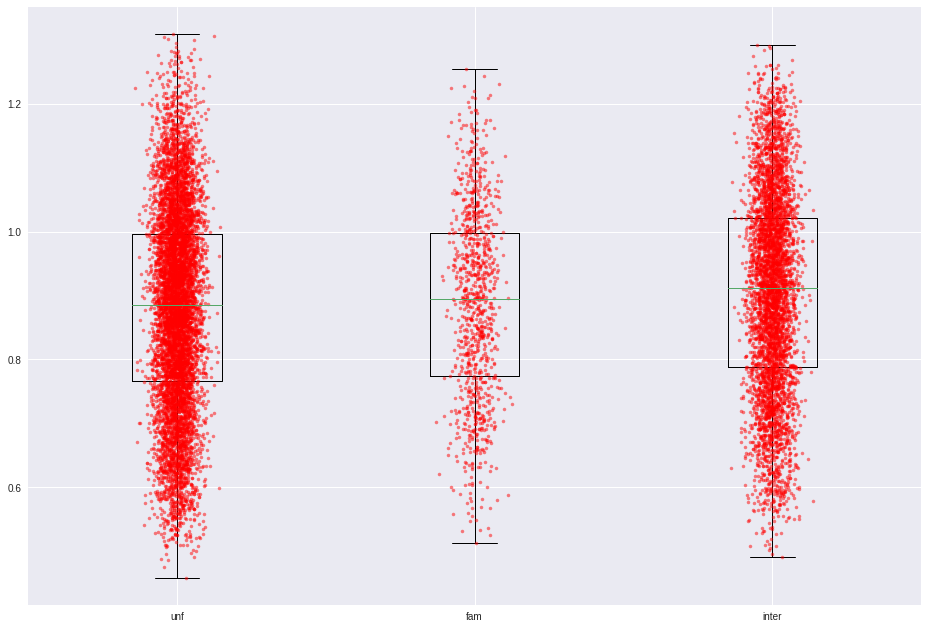

In [195]:
print(intra_fam)
intra_unf_dat = np.ravel(D_unf_unique)
intra_fam_dat = np.ravel(D_fam_unique)
inter_dat = np.ravel(D_fam_unf)

data = [intra_unf_dat, intra_fam_dat, inter_dat]
plt.figure(figsize=(16,11))
plt.boxplot(data)
for i in [1,2,3]:
    y = data[i-1]
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.5)
plt.xticks([1,2,3],['unf', 'fam', 'inter'])

0.306055092914


([<matplotlib.axis.XTick at 0x7fd00e24eb38>,
 <a list of 3 Text xticklabel objects>)

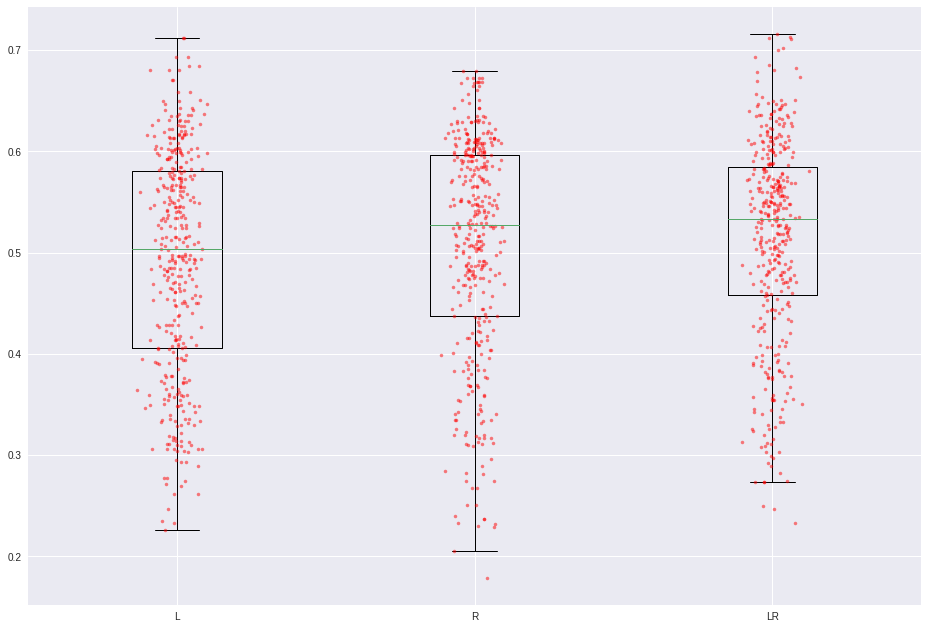

In [173]:
print(intra_fam)
L_dat = np.ravel(D_L)
R_dat = np.ravel(D_R)
LR_dat = np.ravel(D_LR)

data = [L_dat, R_dat, LR_dat]
plt.figure(figsize=(16,11))
plt.boxplot(data)
for i in [1,2,3]:
    y = data[i-1]
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.5)
plt.xticks([1,2,3],['L', 'R', 'LR'])

In [190]:
from scipy.stats import ttest_ind, mannwhitneyu
ttest_ind(intra_unf_dat, intra_fam_dat, equal_var=False)

Ttest_indResult(statistic=-0.64519094792922671, pvalue=0.51891777882372292)

In [189]:
mannwhitneyu(intra_unf_dat, intra_fam_dat, alternative='two-sided')

MannwhitneyuResult(statistic=3838727.0, pvalue=0.41787811672178732)

/home/brad/.conda/envs/neuraltda-3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


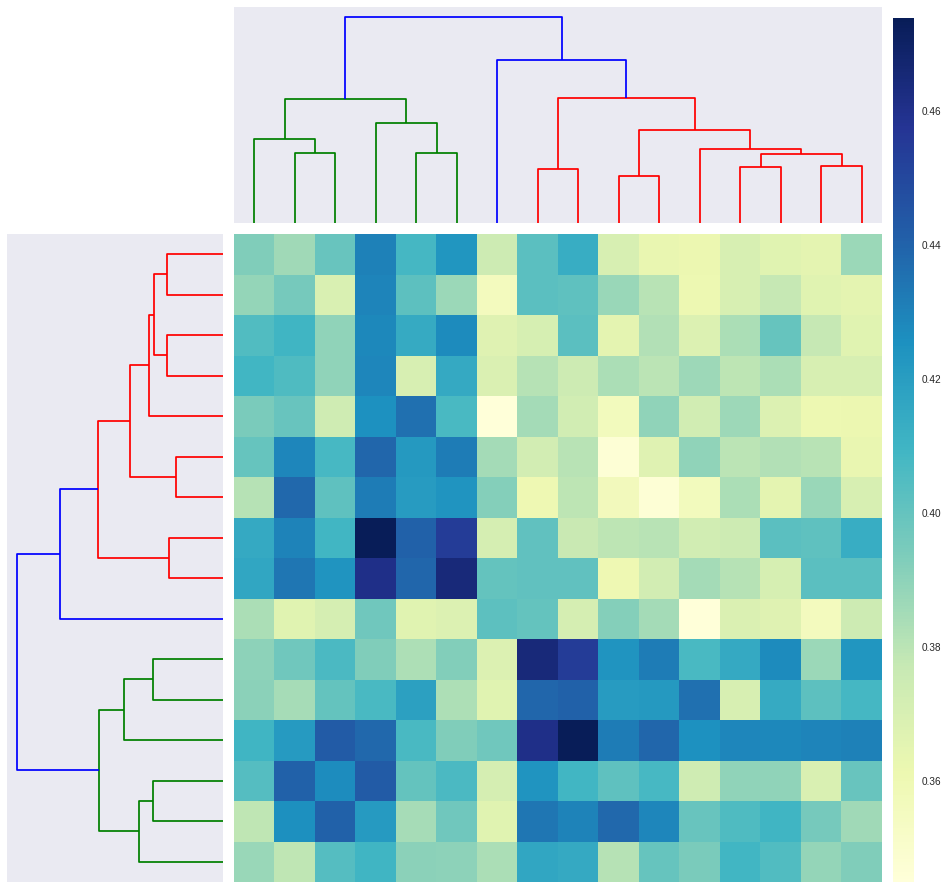

In [119]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate features and distance matrix.
b = 12
JSavg = np.mean(JS[:, :, :, b], axis=2)
D = np.triu(JSavg) + np.triu(JSavg, 1).T
method = 'complete'
# Compute and plot dendrogram.
fig = pylab.figure(figsize=(15,15))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(D, method=method)
Z1 = sch.dendrogram(Y, orientation='left')
ax1.set_xticks([])
ax1.set_yticks([])


#Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(D, method=method)
Z2 = sch.dendrogram(Y,leaf_rotation=90., leaf_font_size=18.)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.imshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu, interpolation='nearest')
axmatrix.set_xticks([])
axmatrix.set_yticks([])
#plt.xticks(range(len(stimlabels)),np.array(list(set(stimlabels)))[idx1])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.8])
plt.colorbar(im, cax=axcolor)

# Display and save figure.
fig.show()


### Test

In [ ]:
reload(sc)
sc.KLdivergence(rho1, rho2)

In [ ]:
%time (a, b) = np.linalg.eig(test)

In [ ]:
b.shape

In [ ]:
sp.sparse.issparse(test)

In [ ]:
test2 = sp.sparse.csc_matrix(test)

In [ ]:
%time (a, b) = sp.sparse.linalg.eigs(test2, k=4000)

In [ ]:
a

In [ ]:
%time test3 = sp.sparse.linalg.expm(test2)

In [ ]:
%time (a, b) = np.linalg.eig(test)

In [ ]:
%time test2 = sp.linalg.expm(k)

In [ ]:
b[b < 0.0000001] = 0

In [ ]:
k = np.diag(a)
k[k<0.000001]=0

In [ ]:
test3

In [ ]:
sp.linalg.expm(np.eye(4))

In [ ]:
testE = sc.simplicialChainGroups([(1,2,3), (3,4,5), (4,5,6,7), (7,8,9)])
testE2 = sc.simplicialChainGroups([(1,2), (3,4,5), (4,5,6), (7,8), (8, 9,10, 11)])
testL = sc.compute_laplacian(testE, 1)
testL2 = sc.compute_laplacian(testE2, 1)
testR = sc.densityMatrix(testL, 1.0)
testR2 = sc.densityMatrix(testL2, 1.0)
testvals = sp.linalg.eigh(testR, eigvals_only=True)
print(testvals)

In [ ]:

Lvals = sp.linalg.eigh(testL, eigvals_only=True)
rvals = np.exp(Lvals)/ np.sum(np.exp(Lvals))
print(rvals)

In [ ]:
print(sa.compute_JS_expanded(testE, testE2, 1, 1.0))

In [ ]:
testE = sc.simplicialChainGroups([(1,2,3), (3,4,5), (4,5,6,7), (7,8,9)])
testE2 = sc.simplicialChainGroups([(1,2), (3,4,5), (4,5,6), (7,8), (8, 9,10, 11)])
testL = sc.compute_laplacian(testE, 1)
testL2 = sc.compute_laplacian(testE2, 1)
(testL, testL2) = sc.reconcile_laplacians(testL, testL2)

testR = sc.densityMatrix(testL, 1.0)
testR2 = sc.densityMatrix(testL2, 1.0)

Lvals1 = sp.linalg.eigh(testL, eigvals_only=True)
rvals1 = np.real(np.exp(Lvals1)/ np.sum(np.exp(Lvals1)))

Lvals2 = sp.linalg.eigh(testL2, eigvals_only=True)
rvals2 = np.real(np.exp(Lvals2)/np.sum(np.exp(Lvals2)))

div = np.sum(np.multiply(rvals1, (np.log(rvals1) - np.log(rvals2))/ np.log(2.0)))
print(div)

In [ ]:
sc.KLdivergence(testR, testR2)

In [ ]:
v1 = sp.linalg.eigh(testR, eigvals_only=True)
print(rvals1 - v1)

In [ ]:
v2 = sp.linalg.eigh(testR2, eigvals_only=True)
print(rvals2-v2)

In [ ]:
np.sum(np.multiply(rvals1, (np.log(rvals1) - np.log(rvals2))/np.log(2.0)))

In [ ]:
reload(sc)


In [ ]:
sc.KLdivergence(testR, testR2)

In [ ]:
np.log(np.trace(sp.linalg.expm(testL)))

In [ ]:
np.exp(np.trace(testL))

In [ ]:
np.trace(testL)

In [ ]:
np.sum(np.exp(Lvals1))

In [ ]:
def KL_div2(L1, L2, beta):
    
    Lvals1 = sp.linalg.eigh(L1, eigvals_only=True)
    Lvals2 = sp.linalg.eigh(L2, eigvals_only=True)
    
    C1 = np.sum(np.exp(beta*Lvals1))
    C2 = np.sum(np.exp(beta*Lvals2))
    
    K = (beta * (L1 - L2) + (np.log(C2/C1))) / np.log(2.0)
    rho = sp.linalg.expm(beta*L1) / C1
    
    return np.trace(np.dot(rho, K))

In [ ]:
KL_div2(testL, testL2, 1.0)

In [ ]:
testK = (sp.linalg.logm(testR) - sp.linalg.logm(testR2)) / np.log(2)

In [ ]:
beta = 1.0
Lvals1 = sp.linalg.eigh(testL, eigvals_only=True)
Lvals2 = sp.linalg.eigh(testL2, eigvals_only=True)
    
C1 = np.sum(np.exp(beta*Lvals1))
C2 = np.sum(np.exp(beta*Lvals2))
    
K = (beta * (testL - testL2) + (np.log(C2/C1))) / np.log(2.0)

In [ ]:
np.amax(np.abs(testR*testR2 - testR2*testR))

In [ ]:
np.amax(np.abs(np.dot(testR, testR2) - np.dot(testR2, testR)))

In [ ]:
np.amax(np.abs(np.dot(testL, testL2) - np.dot(testL2, testL)))

In [ ]:
r, w = np.linalg.eig(testR)
s, w = np.linalg.eig(testR2)

In [ ]:
print(r)
print(s)

In [ ]:
testL2

In [ ]:
sc.Likelihood(testR, testR2)

In [ ]:
r, w1 = np.linalg.eig(testR)
s, w2 = np.linalg.eig(testR2)

In [ ]:
Pbar = np.dot(w2, w1.T).T

In [ ]:
np.diag(k**2)

In [ ]:
rho = testR
sigma = testR2
sigmaprime = np.dot(Pbar, np.dot(testR2, Pbar.T))

sigmaprime2 = np.dot(w1, np.dot(np.diag(s), w1.T))

In [ ]:
sc.KLdivergence_matrixlog(rho, sigmaprime)

In [ ]:
sc.KLdivergence(rho, sigma)

In [ ]:
sc.KLdivergence_matrixlog(rho, sigmaprime2)

In [ ]:
t, x = np.linalg.eig(sigmaprime)
print(t)

In [ ]:
s

In [ ]:
t, x = np.linalg.eig(sigmaprime2)
print(t)

In [ ]:
Drho = np.diag(r)

In [ ]:
Pbar